In [ ]:
# pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
temperatura= ctrl.Antecedent(np.arange(0,46,1), 'temperatura')
valvula = ctrl.Consequent(np.arange(0, 1.01 , .01), 'valvula')

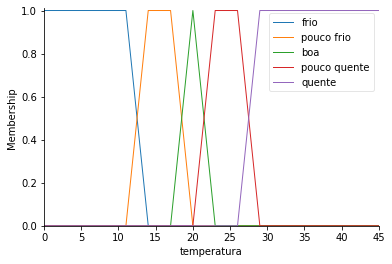

In [ ]:
temperatura['frio'] = fuzz.trapmf(temperatura.universe, [0 , 0 , 11,14])
temperatura['pouco frio'] = fuzz.trapmf(temperatura.universe, [11,14,17,20])
temperatura['boa'] = fuzz.trimf(temperatura.universe, [17 , 20 , 23])
temperatura['pouco quente'] = fuzz.trapmf(temperatura.universe, [20, 23 , 26 , 29])
temperatura['quente'] = fuzz.trapmf(temperatura.universe, [26 , 29 , 45,45])
temperatura.view() # mostra a funçao de pertinencia

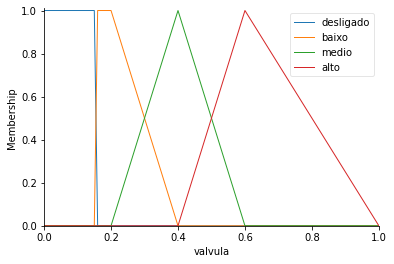

In [ ]:
valvula['desligado']= fuzz.trapmf(valvula.universe, [0 , 0 , .15 , .15])
valvula['baixo']= fuzz.trapmf(valvula.universe, [.16 , 0.16 , 0.2 , 0.4])
valvula['medio']= fuzz.trimf(valvula.universe, [0.2 , 0.40 , 0.60])
valvula['alto']= fuzz.trimf(valvula.universe, [0.4 , 0.60 ,  1.00])
valvula.view()

In [ ]:
regra1 = ctrl.Rule(temperatura['frio'], valvula['alto'])
regra2 = ctrl.Rule(temperatura['pouco frio'], valvula['medio'])
regra3 = ctrl.Rule(temperatura['boa'], valvula['medio'])
regra4 = ctrl.Rule(temperatura['pouco quente'], valvula['baixo'])
regra5 = ctrl.Rule(temperatura['quente'], valvula['desligado'])
regra6 = ctrl.Rule(temperatura['frio'], valvula['alto'])
regra7 = ctrl.Rule(temperatura['pouco frio'], valvula['medio'])
regra8 = ctrl.Rule(temperatura['boa'], valvula['medio'])
regra9 = ctrl.Rule(temperatura['pouco quente'], valvula['baixo'])

In [ ]:
valcula_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5])
abertura = ctrl.ControlSystemSimulation(valcula_ctrl)

0.23896551724137932


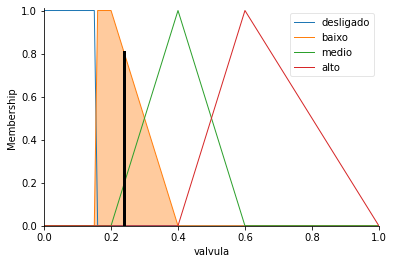

In [ ]:
abertura.input['temperatura'] = 25
abertura.compute()
print(abertura.output['valvula'])
valvula.view(sim=abertura)